# 1. Thông tin nhóm

### *Danh sách thành viên:*

<center>
    
|   MSSV   |      Họ tên      | Tài khoản Github |
|:--------:|:----------------:|:----------------:|
| 19120119 | Nguyễn Minh Phúc |   youngtobesick  |
| 19120387 |    Lê Sỹ Thuần   |    SyThuan1803   |
    
</center>

### *Kế hoạch làm việc:* 
[Xem tại đây](https://docs.google.com/spreadsheets/d/1DCq30ORIH6m-1EYMnbUmZ8fBoxPiiCgRgLDpJaRKRVE/edit?usp=sharing)

---

# 2. Thu thập dữ liệu

#### Dữ liệu của bạn là về chủ đề gì và bạn lấy từ nguồn nào?

Dữ liệu mà nhóm em thu thập được là tập các khảo sát mức độ hài lòng đối với các dịch vụ của các khách sạn ở châu Âu

Dữ liệu được lấy từ nguồn được public trên [Kaggle](https://www.kaggle.com/ishansingh88/europe-hotel-satisfaction-score)

#### Phần mô tả của dữ liệu

Phần mô tả dữ liệu không có gì đặc biệt, chỉ là các dòng mô tả giá trị của các cột có trong dataset.  
Dưới đây là phần mô tả được lấy từ trang publish dataset:  

Columns
Age - 7 to 85

purposeoftravel - aviation, academic, personal, business, tourism.

Type of Travel - Group travel, Personal Travel.

Type Of Booking - Group bookings, Individual/Couple.

Hotel wifi service - Ratings out of 5.

Departure/Arrival convenience - Ratings out of 5.

Ease of Online booking - Ratings out of 5.

Hotel location - Ratings out of 5.

Food and drink - Ratings out of 5.

Stay comfort - Ratings out of 5.

Common Room entertainment - Ratings out of 5.

Checkin/Checkout service - Ratings out of 5.

Other service - Ratings out of 5.

Cleanliness - Ratings out of 5.

satisfaction - satisfied, neutral or dissatisfied.

#### License của dữ liệu

License của dữ liệu là Unknown ([nguồn](https://www.kaggle.com/ishansingh88/europe-hotel-satisfaction-score/metadata)).  
Có vẻ như người publish dữ liệu này lên Kaggle không có yêu cầu gì đối với việc sử dụng dữ liệu, hoặc cũng có thể là quên cập nhật chi tiết License. Nhưng có lẽ việc sử dụng dữ liệu với mục đích học tập thì cũng không đến nỗi nào 😓.

#### Người ta thu thập dữ liệu từ nguồn nào?

Em đã tìm hết tất cả tab ở link bên trên nhưng vẫn không thấy chỗ nào có ghi cách để thu thập bộ dữ liệu này.

Em đoán là có thể lúc khách trả phòng, họ được nhờ để điền mẫu khảo sát về các dịch vụ của khách sạn để thu thập dữ liệu. Vì title chỉ nói chung chung là Europe Hotel mà không để chi tiết là một hay nhiều hotel nào nên cũng có thể là nhóm thu thập dữ liệu tiến hành khảo sát trên cộng đồng nào đó để có thể đưa ra một bộ dữ liệu đồng nhất về các thuộc tính như thế này.

---

# 3. Import các thư viện cần thiết

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

# 4. Khám phá & tiền xử lý dữ liệu

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [4]:
# ehs là viết tắt của europe hotel satisfaction
ehs_df = pd.read_csv('./data/Europe Hotel Booking Satisfaction Score.csv')
ehs_df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [5]:
ehs_df.tail()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied
103903,62567,Male,27,academic,Group Travel,Group bookings,1,3,3,3,1,1,1,4,3,1,neutral or dissatisfied


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [6]:
num_rows = len(ehs_df.index)
num_cols = len(ehs_df.columns)
print(f'Number of rows: {num_rows}')
print(f'Number of cols: {num_cols}')

Number of rows: 103904
Number of cols: 17


Vậy là dữ liệu được thu thập hơn 100 nghìn dòng (có thể tồn tại các dòng bị trùng nhau) với khoảng 15 thuộc tính được khảo sát.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả của file dữ liệu và theo quan sát sơ bộ thì mỗi dòng đại diện cho một khảo sát của một người cụ thể với các dịch vụ của khách sạn, và nhìn chung thì em hy vọng là không có dòng nào có ý nghĩa khác với những dòng còn lại (nếu có thì trong quá trình khám phá và phân tích, ta có thể lược bỏ các dòng này sau).

### Dữ liệu có các dòng bị lặp không?

In [7]:
duplicated_rows_df = ehs_df[ehs_df.duplicated()]
have_duplicated_rows = (len(duplicated_rows_df.index) != 0)
print(f'Dataframe has duplicated rows - {have_duplicated_rows}')

Dataframe has duplicated rows - False


Okay, theo như kết quả của của dòng code phía trên thì dataframe của ta không tồn tại các dòng bị trùng nhau, ta có thể tiếp tục khám phá mà không cần ở lại xử lý vấn đề bị lặp dòng này.

### Mỗi cột có ý nghĩa gì?

Tuy phần thông tin mô tả dữ liệu đã đề cập đến tên các cột và giá trị của các cột này, nhưng nó không đề cập đến ý nghĩa của tên cột nên em nghĩ là sẽ giải đáp một cách khá tương đối về vấn đề này và hy vọng là không có sự hiểu nhầm ở đây 😉.

Sau đây là ý nghĩa của các cột và các giá trị (được trích từ thông tin mô tả dữ liệu, các dòng không để giá trị ở dưới đây mặc định là điểm ratings từ 0-5):

- id: mã định danh của một khảo sát
- Gender: giới tính của đối tượng khảo sát
- Age: tuổi của đối tượng khảo sát (từ 7-85)
- purpose_of_travel: mục đích của chuyến đi trong lúc sử dụng khách sạn (gồm aviation, academic, personal, business, tourism)
- Type of Travel: loại chuyến đi (gồm Group travel, Personal Travel)
- Type of Booking: loại đặt phòng (gồm Group bookings, Individual/Couple)
- Hotel wifi service: dịch vụ wifi ở khách sạn
- Departure/Arrival convenience: sự thuận tiện trong việc đến và đi
- Ease of Online booking: thuận tiện trong việc đặt phòng online
- Hotel location: mức độ phù hợp của vị trí địa lý khách sạn
- Food and drink: thức ăn và thức uống của khách sạn
- Stay comfort: sự thoải mái trong việc sinh hoạt
- Common Room entertainment: các vấn đề giải trí thông thường tại phòng
- Checkin/Checkout service: dịch vụ checkin/checkout phòng
- Other service: các dịch vụ khác
- Cleanliness: độ sạch sẽ nói chung của khách sạn
- satisfaction: mức độ hài lòng của khách (gồm satisfied, neutral or dissatisfied)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Trước khi xem kiểu dữ liệu của các cột, ta cần format tên cột theo một chuẩn nhất định để dễ thao tác hơn. Chuẩn được đặt ra ở đây đó chính là viết thường các ký tự tên cột và thay thế khoảng trắng bằng dấu gạch dưới (underscore)

In [8]:
def convert_name(old_name):
    new_name = old_name.lower()
    new_name = new_name.replace('  ', '_')
    new_name = new_name.replace(' ', '_')
    new_name = new_name.replace('/', '_')
    return new_name

ehs_df.rename(columns=convert_name, inplace=True)
ehs_df.columns

Index(['id', 'gender', 'age', 'purpose_of_travel', 'type_of_travel',
       'type_of_booking', 'hotel_wifi_service',
       'departure_arrival_convenience', 'ease_of_online_booking',
       'hotel_location', 'food_and_drink', 'stay_comfort',
       'common_room_entertainment', 'checkin_checkout_service',
       'other_service', 'cleanliness', 'satisfaction'],
      dtype='object')

In [9]:
col_dtypes = ehs_df.dtypes
col_dtypes

id                                int64
gender                           object
age                               int64
purpose_of_travel                object
type_of_travel                   object
type_of_booking                  object
hotel_wifi_service                int64
departure_arrival_convenience     int64
ease_of_online_booking            int64
hotel_location                    int64
food_and_drink                    int64
stay_comfort                      int64
common_room_entertainment         int64
checkin_checkout_service          int64
other_service                     int64
cleanliness                       int64
satisfaction                     object
dtype: object

Hiện tại thì `ehs_df` chỉ có 5 cột có `dtype` là `object`: "gender", "purpose_of_travel", "type_of_travel", "type_of_booking", "satisfaction". Chúng ta sẽ thử xem các cột này đang giữ các kiểu dữ liệu nào.

In [10]:
def open_object_dtype(s):
    return set(s.apply(type))

obj_cols_name = ["gender", "purpose_of_travel",
                 "type_of_travel", "type_of_booking", "satisfaction"]

for col_name in obj_cols_name:
    print(f"{col_name}: {open_object_dtype(ehs_df[col_name])}")

gender: {<class 'str'>}
purpose_of_travel: {<class 'str'>}
type_of_travel: {<class 'str'>}
type_of_booking: {<class 'str'>}
satisfaction: {<class 'str'>}


Hiện tại thì các cột này đều nắm giữ các giá trị có cùng một kiểu dữ liệu, và có vẻ như tất cả đều ổn. Chúng ta thử xem qua các giá trị hiện có trong cột "satisfaction"

In [11]:
ehs_df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

Cột "satisfaction" hiện đang có hai giá trị là 'neutral or dissatisfied', 'satisfied'. Nếu để nguyên như vậy và tiếp tục khám phá thì có lẽ sẽ khá rắc rối nên ta sẽ chuyển các cột này về dạng số.

**Vấn đề cần tiền xử lý:**
- Cột "satisfaction" đang có dtype là str. Để có thể tiếp tục khám phá thêm về cột này, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng số với hai giá trị là 0 cho 'neutral or dissatisfied' và 1 cho 'satisfied'.

## Tiền xử lý

### Chuyển dữ liệu của cột "satisfaction" về dạng số

Ta sẽ chuyển cột này về dạng số với format là 0 cho 'neutral or dissatisfied' và 1 cho 'satisfied', sau khi chuyển thì `dtype` của cột này sẽ là `int64`

In [12]:
ehs_df['satisfaction'].replace(
    to_replace=['neutral or dissatisfied', 'satisfied'],
    value=[0, 1],
    inplace=True
)

In [13]:
ehs_df['satisfaction'].unique()

array([0, 1], dtype=int64)

---

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Ta sẽ xếp cột "satisfaction" vào nhóm numeric luôn.

Sau khi tiền xử lý dtype cho cột "satisfaction" về int64 thì hiện có 13 cột có vẻ là thuộc nhóm numeric: "id", "age", "hotel_wifi_service", "departure_arrival_convenience", "ease_of_online_booking", "hotel_location", "food_and_drink", "stay_comfort", "common_room_entertainment", "checkin_checkout_service", "other_service", "cleanliness", "satisfaction".

Tuy nhiên, cột "id" thật ra có dạng categorical (vì là mã được đánh dưới dạng số). Như vậy, chỉ có 12 cột numeric và các cột ngoại trừ "age" đều là thang điểm từ 0-5.

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max và lưu kết quả vào dataframe nume_col_profiles_df. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có 12 cột có tên được nêu ở trên.

In [14]:
def missing_ratio(s):
    return s.isna().mean() * 100

cate_col_name = ["id", "gender", "purpose_of_travel", "type_of_travel", "type_of_booking"]
nume_col_idx = ehs_df.columns.drop(cate_col_name)
nume_col_df = ehs_df[nume_col_idx]
nume_col_profiles_df = nume_col_df.agg([missing_ratio, pd.Series.min, pd.Series.max])

nume_col_profiles_df

,age,hotel_wifi_service,departure_arrival_convenience,ease_of_online_booking,hotel_location,food_and_drink,stay_comfort,common_room_entertainment,checkin_checkout_service,other_service,cleanliness,satisfaction
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,85.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0


Ta sẽ xem rõ hơn về sự phân bố của các giá trị trong mỗi cột có kiểu là numeric bằng hàm plot_hist_cols với hai tham số truyền vào là dataframe và số cột.

In [15]:
def plot_hist_cols(df, num_graph_per_row):
    n_rows, n_cols = df.shape
    col_names = list(df.columns)
    n_rows_graph = (n_cols + num_graph_per_row - 1) / num_graph_per_row
    
    plt.figure(
        figsize = (6 * num_graph_per_row,  6 * n_rows_graph),
        dpi = 80,
    )
    
    for i in range(n_cols):
        plt.subplot(int(n_rows_graph), num_graph_per_row, i + 1)
        col_i = df.iloc[:, i]
        
        if (not np.issubdtype(type(col_i.iloc[0]), np.number)):
            val_counts = col_i.value_counts()
            plt.xticks(rotation = 90)
            val_counts.plot.bar()
        else:
            nunique_col_i = col_i.nunique()
            bins = nunique_col_i if (nunique_col_i < 10) else 10
            col_i.hist(bins=bins)
        
        plt.ylabel('counts')
        plt.title(f'{col_names[i]}')
        
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()

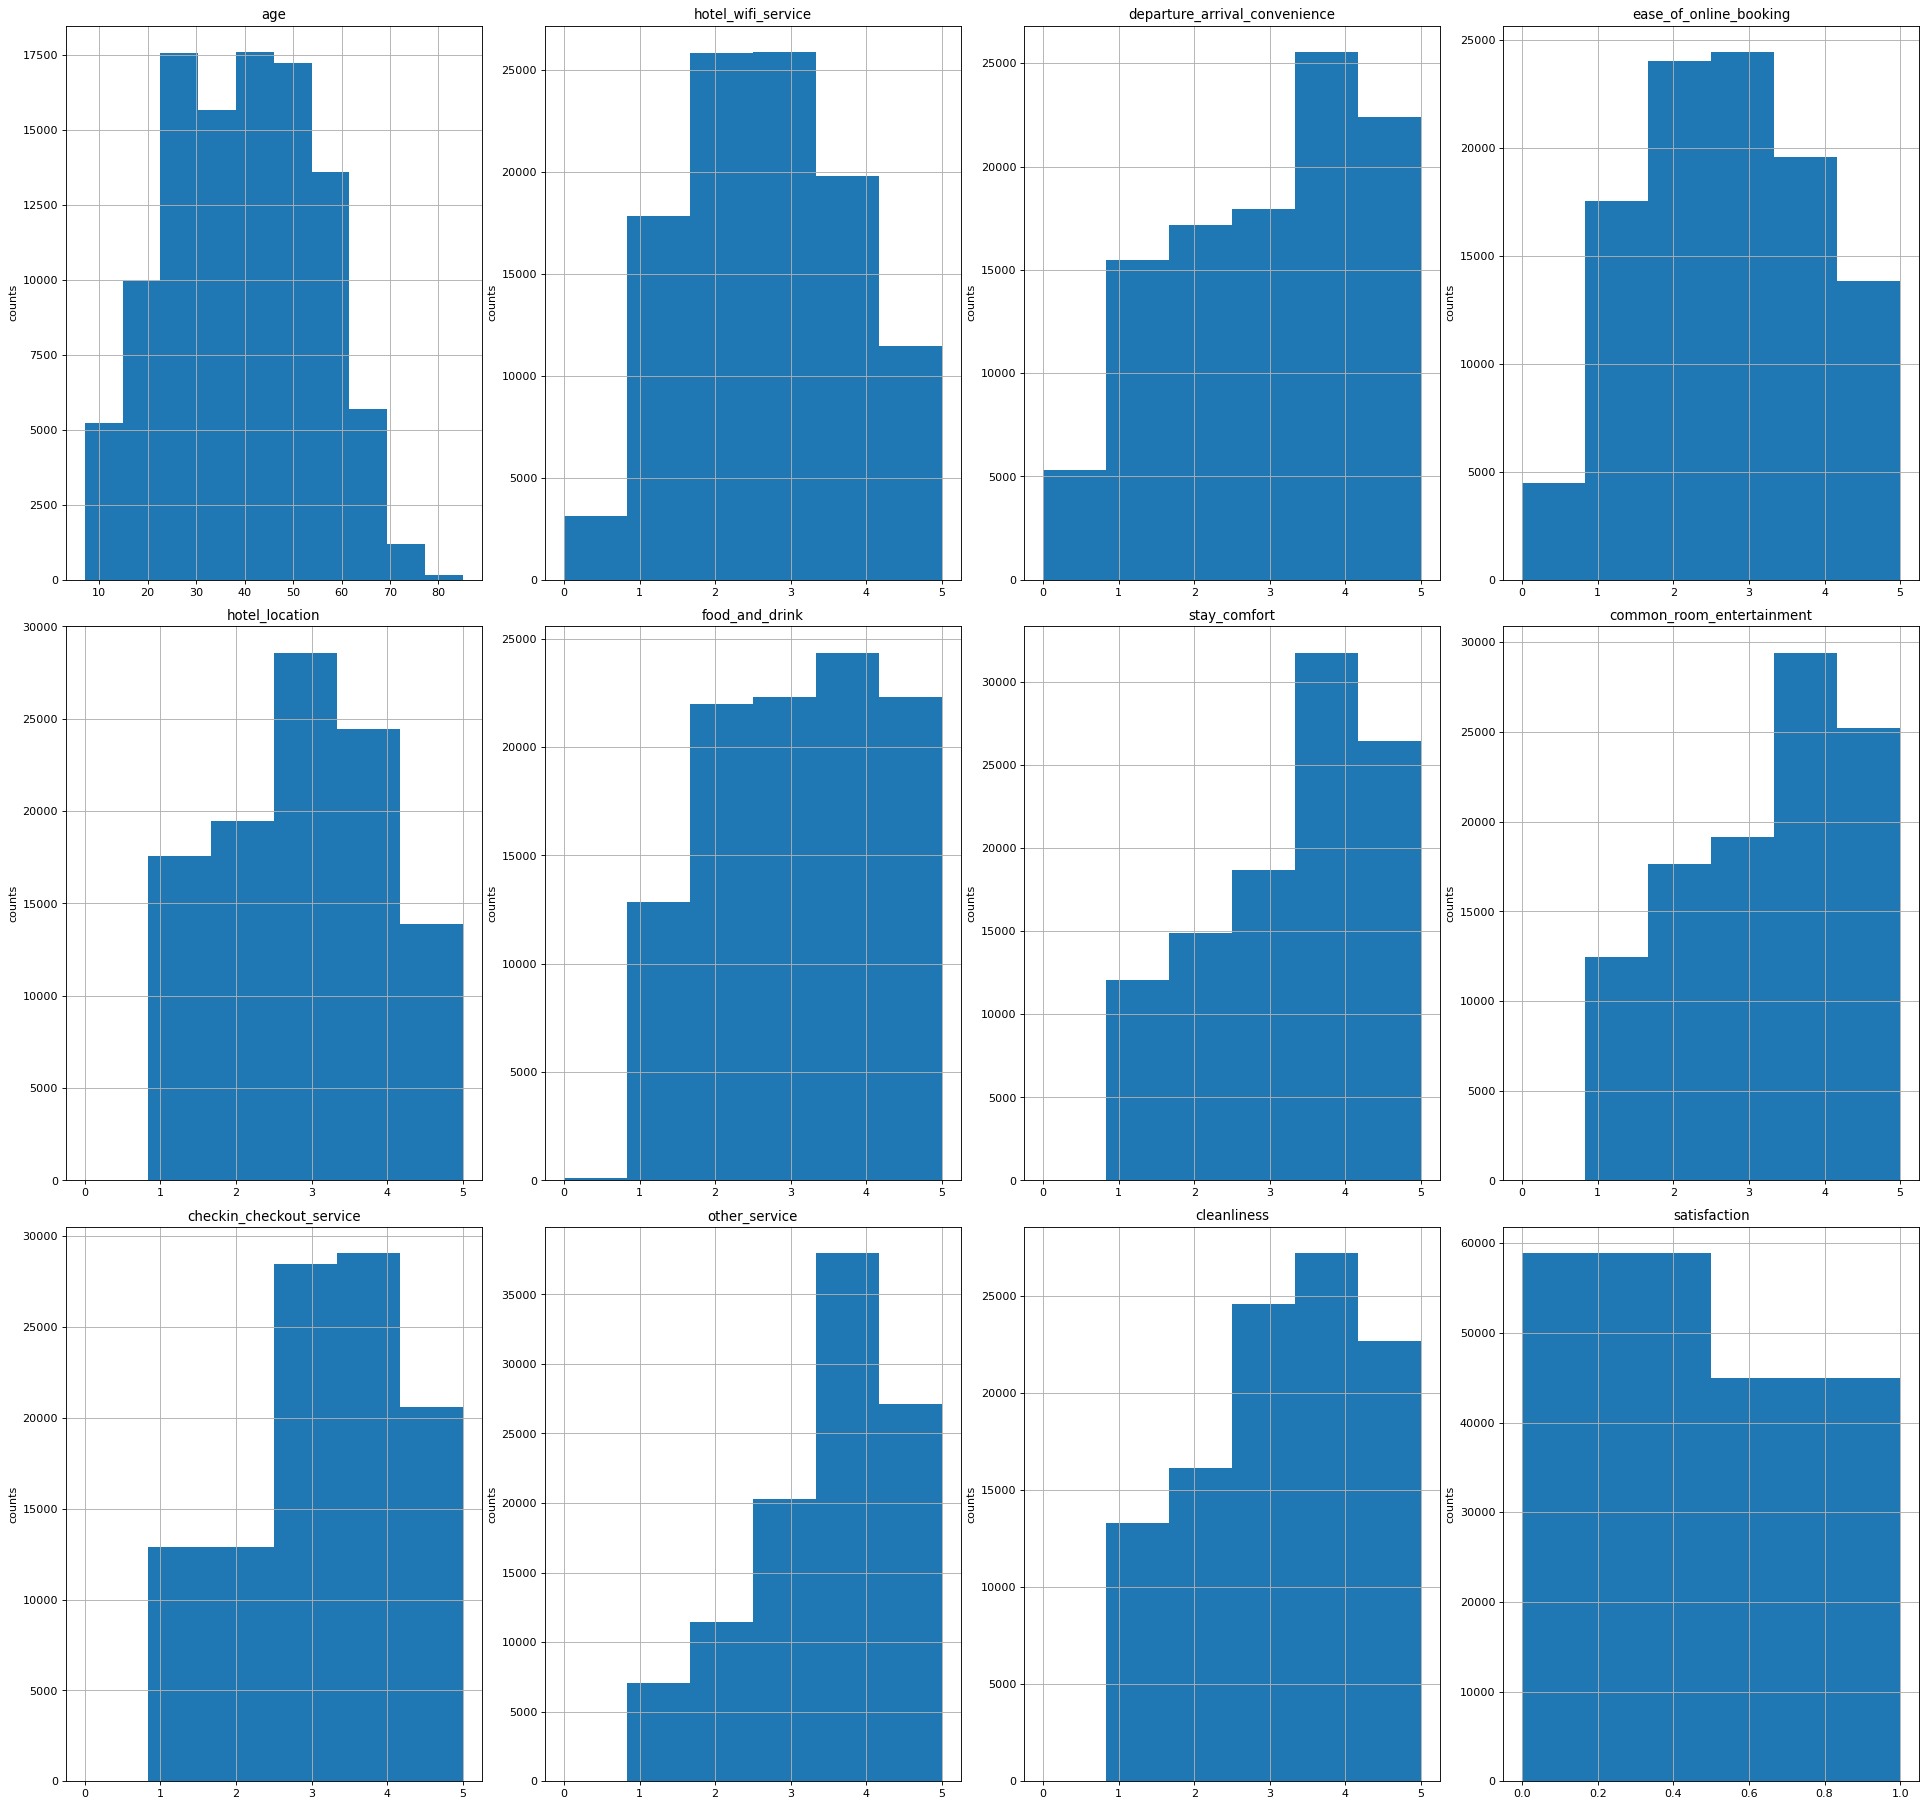

In [16]:
plot_hist_cols(nume_col_df, 4)

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

`ehs_df` có 5 cột categorical là "id", "gender", "purpose_of_travel", "type_of_travel", "type_of_booking".

Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu), và lưu kết quả vào dataframe cate_col_profiles_df. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 5 cột là "id", "gender", "purpose_of_travel", "type_of_travel", "type_of_booking".

In [17]:
cate_col_df = ehs_df[cate_col_name]

cate_col_profiles_df = cate_col_df.agg([missing_ratio, pd.Series.nunique, pd.Series.unique])

cate_col_profiles_df.rename(
    index={'nunique': 'num_diff_vals', 'unique': "diff_vals"},
    inplace=True
)

cate_col_profiles_df

,id,gender,purpose_of_travel,type_of_travel,type_of_booking
missing_ratio,0.0,0.0,0.0,0.0,0.0
num_diff_vals,103904,2,5,2,3
diff_vals,"[70172, 5047, 110028, 24026, 119299, 111157, 8...","[Male, Female]","[aviation, tourism, business, academic, personal]","[Personal Travel, Group Travel]","[Not defined, Group bookings, Individual/Couple]"


Ta sẽ xem rõ hơn về sự phân bố của các giá trị trong mỗi cột có kiểu là categorical

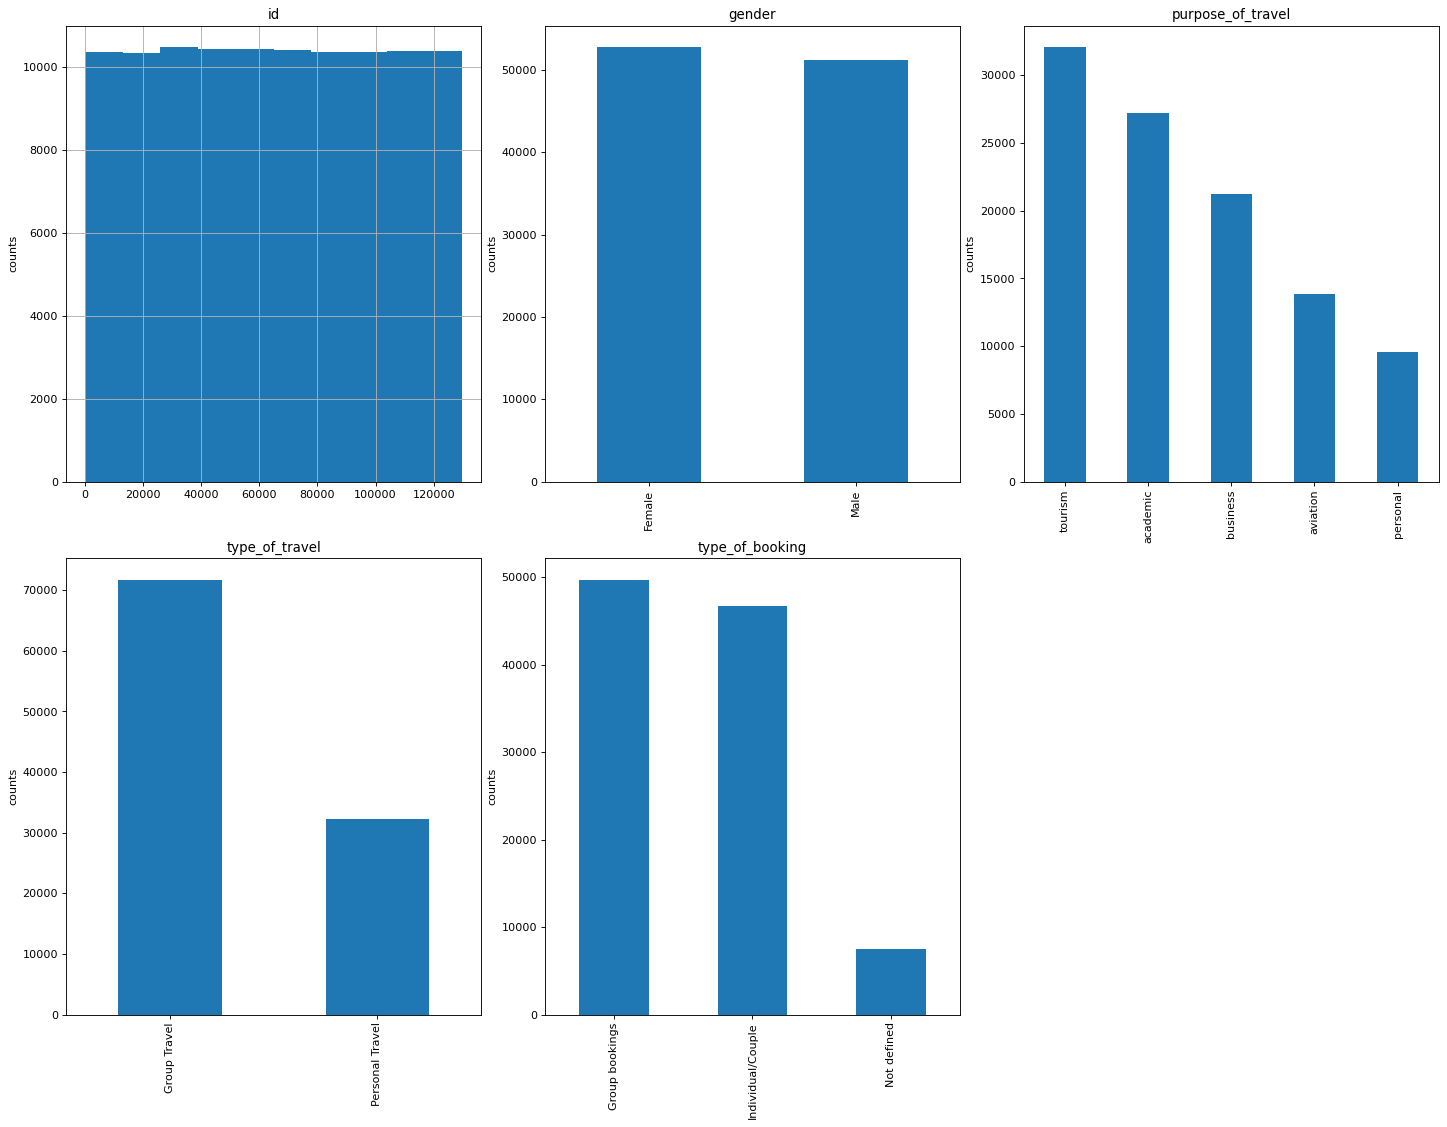

In [18]:
plot_hist_cols(cate_col_df, 3)

In [28]:
tmp_df = ehs_df[['type_of_travel', 'type_of_booking']]
tmp_df = tmp_df[tmp_df['type_of_travel'] == 'Personal Travel']
tmp_df[tmp_df['type_of_booking'] == 'Group bookings']

,type_of_travel,type_of_booking
46,Personal Travel,Group bookings
97,Personal Travel,Group bookings
143,Personal Travel,Group bookings
149,Personal Travel,Group bookings
188,Personal Travel,Group bookings
...,...,...
103622,Personal Travel,Group bookings
103658,Personal Travel,Group bookings
103715,Personal Travel,Group bookings
103733,Personal Travel,Group bookings


---

# 5. Đưa ra các câu hỏi cần trả lời

---

# 6.Tiền xử lý, phân tích dữ liệu để trả lời cho từng câu hỏi

## 6.1 Câu hỏi 1

### Tiền xử lý

### Phân tích dữ liệu để trả lời cho các câu hỏi 

---

## 6.2 Câu hỏi 2

### Tiền xử lý

### Phân tích dữ liệu để trả lời cho các câu hỏi 

---

# 7. Nhìn lại quá trình làm đồ án

## Thành viên 1

- Họ tên:
- Đã gặp những khó khăn gì?
- Có học được gì hữu ích?

## Thành viên 2

- Họ tên:
- Đã gặp những khó khăn gì?
- Có học được gì hữu ích?

## Nhóm
**Nếu có thêm thời gian thì sẽ làm gì?**

# 8. Tài liệu tham khảo